## L'effet «&#x202f;rolling shutter&#x202f;»

Le *rolling shutter* est un artefact produit par un appareil photographique qui fixe une image par déroulement. Il engendre des déformations sur l'image capturée.

Les appareils photo numériques capturent chaque ligne successivement. Si la vitesse de déplacement ou de rotation de l'engin est proche de la vitesse de capture de l'image, alors des artefacts apparaissent.

On trouve notamment beaucoup d'images d'hélices de turbopropulseurs en rotation avec des artefacts caractéristiques.  
Le morceau de code Python ci-dessous permet de simuler ces déformations.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

On choisit de modéliser une hélice à $n$ pales par l'équation polaire $r = sin(n\cdot\theta)$.  
Par exemple, pour $n=7$ pales:

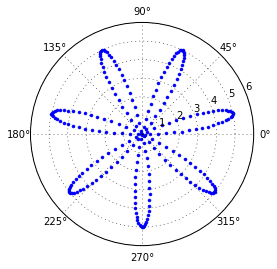

In [2]:
theta = np.linspace(0, 2 * np.pi, 500)
r = 5 * np.sin(7 * theta)
plt.polar(theta, r, '.')

On construit une image en manipulant une grille d'une résolution donnée.  
On retrouve les coordonnées polaires de chaque point et on module l'argument de chaque ligne par la vitesse de rotation.

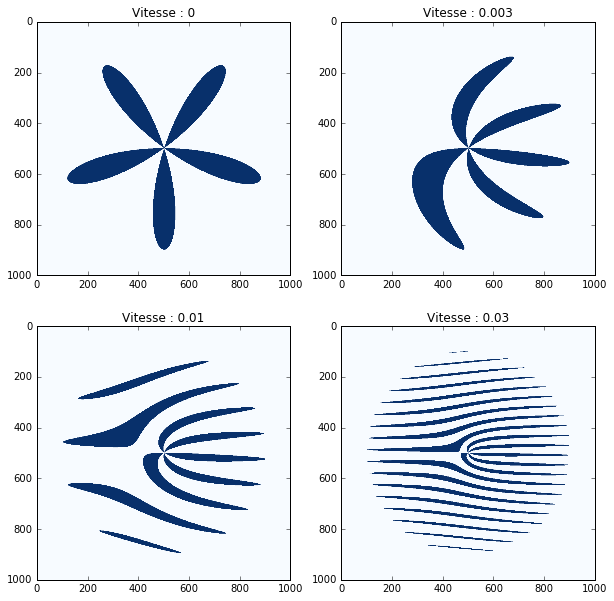

In [3]:
def propellers(nb_prop, speed, ax, resolution=1000):
    
    # Construction de la grille
    x = np.arange(resolution)
    y = np.arange(resolution)
    xx, yy = np.meshgrid(x, y)
    
    # Centrage de la grille
    xx = xx - resolution/2
    yy = yy - resolution/2
    
    # Le 2e terme simule la capture ligne par ligne lors de la rotation
    theta = np.arctan2(yy, xx) + speed * yy
    r = np.sqrt(xx * xx + yy * yy)
    
    # Colormap à peu près lisible
    ax.imshow(r <= 4 * resolution / 10 * np.sin(nb_prop * theta),
              cmap=plt.cm.Blues)
    ax.set_title("Vitesse : {}".format(speed))

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

propellers(5, 0,    ax[0, 0])
propellers(5, .003, ax[0, 1])
propellers(5, .01,  ax[1, 0])
propellers(5, .03,  ax[1, 1])